<a href="https://colab.research.google.com/github/shsarv/ML-and-its-Application/blob/main/PCA%20on%20Bigmart%20Dataset/BigMart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="Center">PCA on BigMart Sales DataSet</h1>
 

---


 ### **Objective**
 * Identify Principal Components of Bigmart Sales using Principal Component Analysis.

 * PLot the Result of PCA.

---
**Submission by:-**

**Name** - Sarvesh Kumar Sharma

**Section** - A

**Roll no** - 50

**Uni. Roll No** - 181500625


---



---



### Importing Essential Librares

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import io
import requests
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [2]:
## Loading DataSet

url1 = "https://raw.githubusercontent.com/shsarv/ML-and-its-Application/main/PCA%20on%20Bigmart%20Dataset/Train.csv"
url2="https://raw.githubusercontent.com/shsarv/ML-and-its-Application/main/PCA%20on%20Bigmart%20Dataset/Test.csv"
s = requests. get(url1).content
train = pd. read_csv(io. StringIO(s. decode('utf-8')))
s2=requests. get(url2).content
test= pd. read_csv(io. StringIO(s2. decode('utf-8')))

**Since We have to do find the Principal Component using Principal Component Analysis, we will using only training data to work upon.**

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### **Information about Dataset**

In [4]:
#Information about the dataSet

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train.shape

(8523, 12)

In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Data Preprocessing

### Handling Missing Values
We Will be Using ***Simple Imputer*** for imputing the missing values and using ***Most_Frequent*** Strategy for String Attributes and ***Mean*** otherwise.

In [8]:
imputer=SimpleImputer()
train[['Item_Weight']]=imputer.fit_transform(train[['Item_Weight']])
im = SimpleImputer(strategy='most_frequent')
train[['Outlet_Size']]=im.fit_transform(train[['Outlet_Size']])
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
# Converting year to timespan

train['Outlet_Establishment_Year'] = 2020 - train['Outlet_Establishment_Year']
train['Outlet_Establishment_Year'].value_counts()

35    1463
33     932
23     930
21     930
16     930
18     929
11     928
13     926
22     555
Name: Outlet_Establishment_Year, dtype: int64

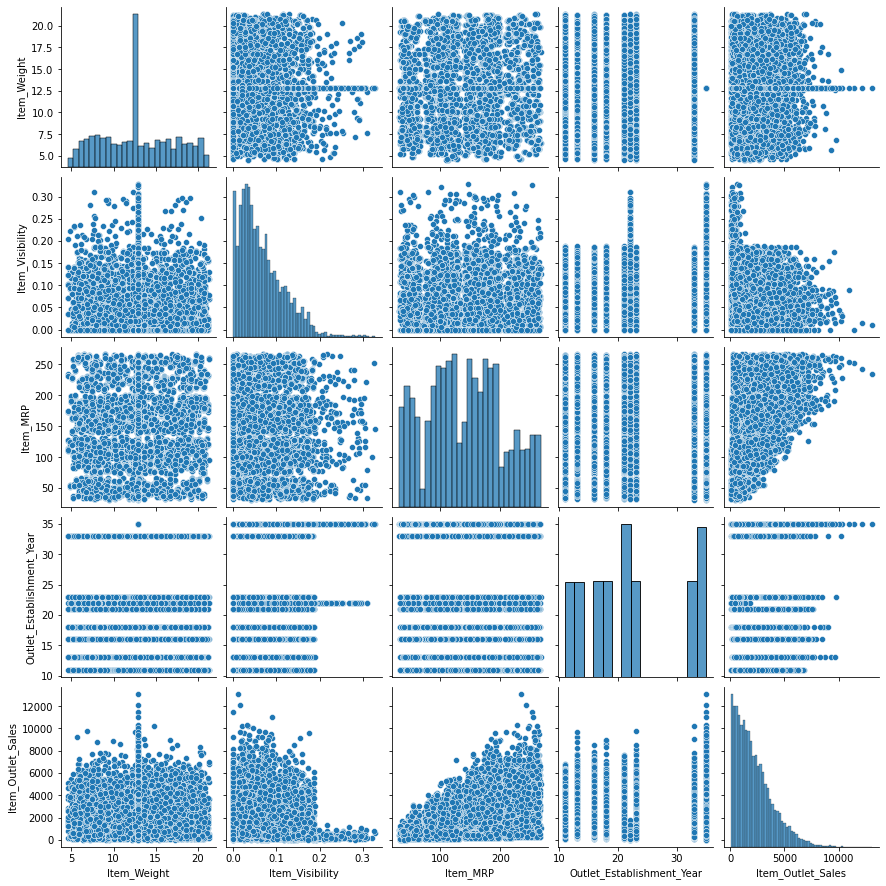

In [10]:
# Pairplot between only the int attributes

sns.pairplot(train)

### **Encoding**

In [11]:
# We will be using Label Encoding for Categorical Variables.

from sklearn.preprocessing import LabelEncoder
train=train.apply(LabelEncoder().fit_transform)

In [12]:
# Shape of dataSet

train.shape

(8523, 12)

In [13]:
# Removing Target Attribute

y=train['Item_Outlet_Sales']
X=train.drop('Item_Outlet_Sales',axis=1)

In [14]:
#No. of Unique values in target attribute.

y.nunique()

3493

### **Feature Scaling**

In [15]:
# Using Standard Scaling for Scaling the features.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data= scaler.fit_transform(X)

# **PCA**

First we will try to find the best number of components of PCA neede to explain varience for this dataset.

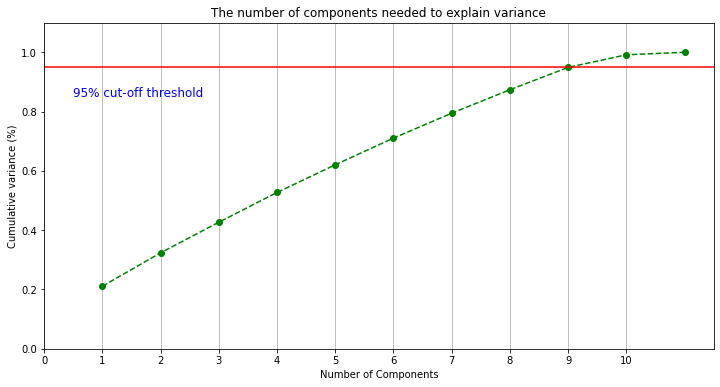

In [16]:
pca = PCA().fit(data)
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='g')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'blue', fontsize=12)

ax.grid(axis='x')
plt.show()

We will be using **number of components = 8**.

In [17]:
# Reducing dimension of dataset.

pca=PCA(n_components=8)
X_reduced = pca.fit_transform(data)

### Plotting Different components of reduced Dataset.

Text(0, 0.5, 'Second Principal Component')

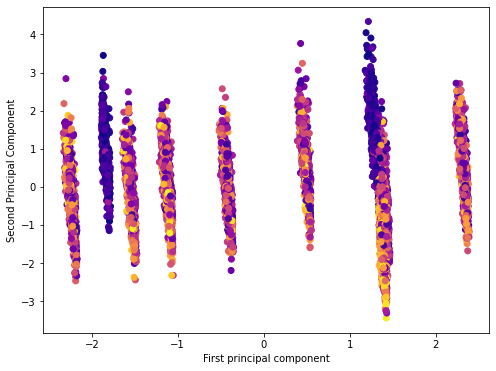

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=train['Item_Outlet_Sales'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Fourth Principal Component')

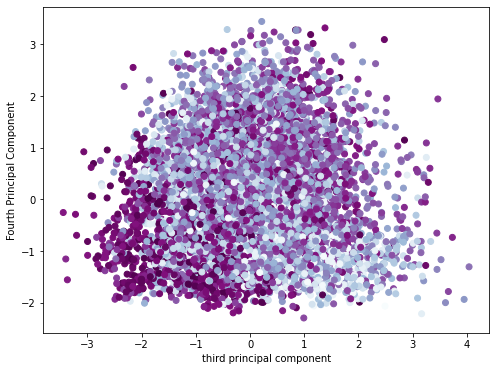

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,2],X_reduced[:,3],c=train['Item_Outlet_Sales'],cmap='BuPu_r')
plt.xlabel('third principal component')
plt.ylabel('Fourth Principal Component')

Text(0, 0.5, 'Six Principal Component')

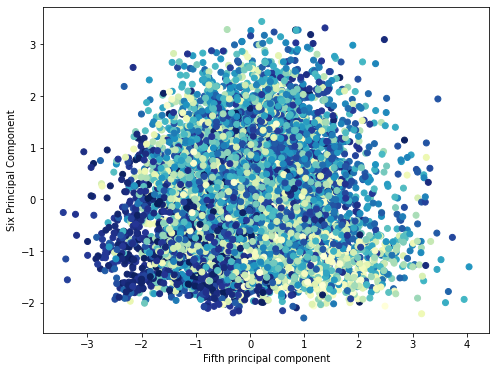

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,2],X_reduced[:,3],c=train['Item_Outlet_Sales'],cmap='YlGnBu_r')
plt.xlabel('Fifth principal component')
plt.ylabel('Six Principal Component')

#### Eigen Values

In [21]:
## eigen values found

pca.explained_variance_

array([2.32001808, 1.23974763, 1.13553087, 1.10430182, 1.02683609,
       0.99103803, 0.92397144, 0.87046028])

#### Eigen vectors / Pricipal Components

In [22]:
## Eigen vectors found

pca.components_

array([[ 0.00512111,  0.01843504,  0.00132496, -0.0242439 ,  0.00311068,
        -0.00352507, -0.51671924,  0.0047183 , -0.52741908,  0.61978444,
         0.26400308],
       [-0.21491984, -0.25479418,  0.35750947,  0.50872061, -0.30373805,
        -0.07523582, -0.32613097, -0.09906718, -0.03067543, -0.04000401,
        -0.53445811],
       [-0.35802384, -0.0679546 ,  0.55924353, -0.17710592, -0.43152486,
        -0.18455935,  0.28130028,  0.05169507,  0.01056746,  0.04168553,
         0.46813869],
       [-0.08559108, -0.56411535, -0.09999157, -0.35593341,  0.10630157,
        -0.08405195, -0.00891146, -0.71844944,  0.03632641,  0.03909148,
        -0.0173096 ],
       [-0.65389663,  0.1230145 ,  0.16867181,  0.05803785,  0.51428509,
         0.50761898,  0.00377117, -0.05359348,  0.00994157,  0.00958717,
         0.01498844],
       [-0.40250158, -0.01110635, -0.20525906,  0.04760589,  0.35498247,
        -0.78862416, -0.01211937,  0.20460656, -0.03442673, -0.02321587,
        -0.042

In [23]:
# Creating pandas dataframe of the pca Components

df_comp = pd.DataFrame(pca.components_,columns=X.columns)

In [24]:
df_comp

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.005121,0.018435,0.001325,-0.024244,0.003111,-0.003525,-0.516719,0.004718,-0.527419,0.619784,0.264003
1,-0.214920,-0.254794,0.357509,0.508721,-0.303738,-0.075236,-0.326131,-0.099067,-0.030675,-0.040004,-0.534458
2,-0.358024,-0.067955,0.559244,-0.177106,-0.431525,-0.184559,0.281300,0.051695,0.010567,0.041686,0.468139
3,-0.085591,-0.564115,-0.099992,-0.355933,0.106302,-0.084052,-0.008911,-0.718449,0.036326,0.039091,-0.017310
4,-0.653897,0.123015,0.168672,0.058038,0.514285,0.507619,0.003771,-0.053593,0.009942,0.009587,0.014988
5,-0.402502,-0.011106,-0.205259,0.047606,0.354982,-0.788624,-0.012119,0.204607,-0.034427,-0.023216,-0.042379
6,-0.017957,-0.747102,-0.219676,0.215202,0.031824,0.219370,0.144699,0.481538,-0.073788,0.001818,0.198861
7,0.039451,-0.131809,0.283676,-0.685349,0.082722,0.045428,-0.152299,0.401295,-0.188950,-0.131733,-0.429767


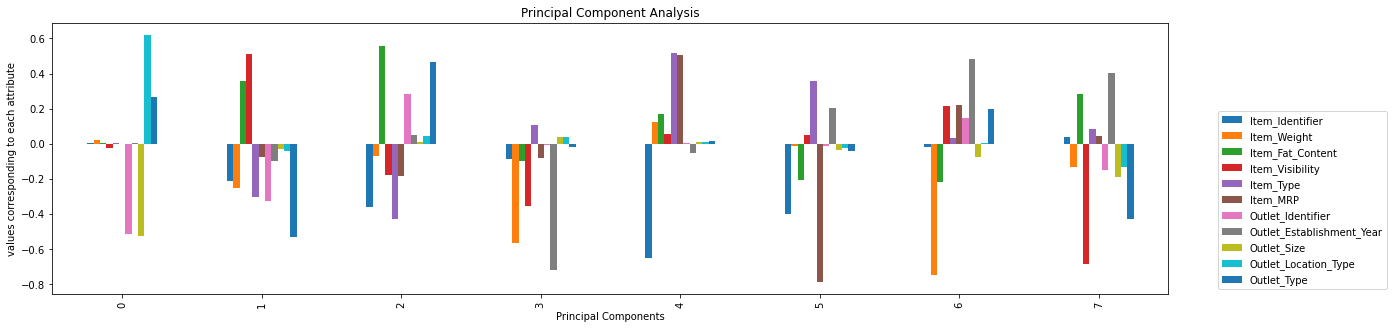

In [25]:
ax=df_comp.plot(kind="bar",figsize=(20,5))
ax.set_xticks(df_comp.index)
ax.set_xticklabels(df_comp.index,rotation=90)
plt.title('Principal Component Analysis')
plt.xlabel('Principal Components')
plt.ylabel('values corresponding to each attribute')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();

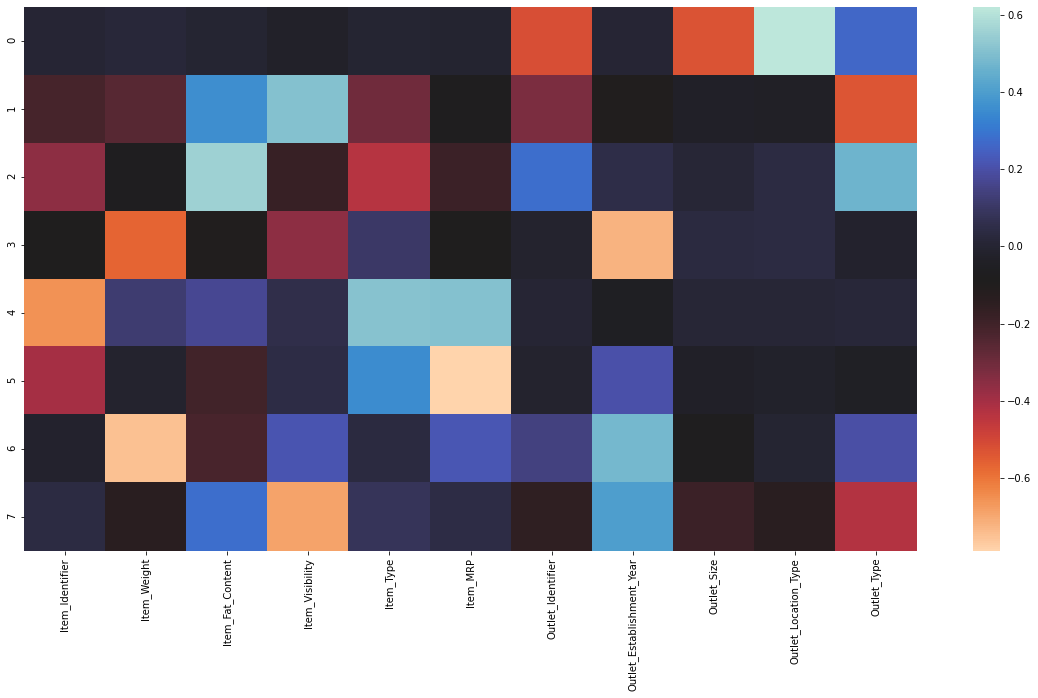

In [26]:
# heatmap

plt.figure(figsize=(20,10))
sns.heatmap(df_comp,cmap='icefire_r')

Thank you.